In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.inspection import permutation_importance

### 1. Read data

In [2]:
stroke = pd.read_csv('stroke.csv')


In [3]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31,0,0,2,4,1,70.66,27.2,4,0
1,2,13,0,0,2,1,1,85.81,18.6,2,0
2,1,18,0,0,2,2,2,60.56,33.0,4,0
3,2,65,0,0,1,2,2,205.77,46.0,3,1
4,1,4,0,0,2,1,1,90.42,16.2,2,0


### 2. Data cleaning

In [4]:
stroke.dtypes

gender                 int64
age                    int64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [5]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1136 non-null   int64  
 1   age                1136 non-null   int64  
 2   hypertension       1136 non-null   int64  
 3   heart_disease      1136 non-null   int64  
 4   ever_married       1136 non-null   int64  
 5   work_type          1136 non-null   int64  
 6   Residence_type     1136 non-null   int64  
 7   avg_glucose_level  1136 non-null   float64
 8   bmi                1084 non-null   float64
 9   smoking_status     1136 non-null   int64  
 10  stroke             1136 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 97.8 KB


In [6]:
stroke.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  52
smoking_status        0
stroke                0
dtype: int64

In [7]:
stroke.dropna(subset=['bmi'], inplace=True)

In [8]:
stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1084 entries, 0 to 1135
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1084 non-null   int64  
 1   age                1084 non-null   int64  
 2   hypertension       1084 non-null   int64  
 3   heart_disease      1084 non-null   int64  
 4   ever_married       1084 non-null   int64  
 5   work_type          1084 non-null   int64  
 6   Residence_type     1084 non-null   int64  
 7   avg_glucose_level  1084 non-null   float64
 8   bmi                1084 non-null   float64
 9   smoking_status     1084 non-null   int64  
 10  stroke             1084 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 101.6 KB


### 3. Set target and features

In [10]:
y = stroke['stroke'].values
X = stroke.drop(["stroke"], axis=1).values

### 4. Test train split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Model fitting

In [12]:
from sklearn.linear_model import LogisticRegression 

accuracies = {}

lr = LogisticRegression()
lr.fit(X_train, y_train)

# acc = lr.score(X_test, y_test)*100
accuracies['Logistic Regression'] = lr.score(X_test, y_test)*100
# accuracies['Logistic Regression'] = acc

# print("Test Accuracy {:.3f}%".format(acc))
print(f"Test Accuracy {accuracies['Logistic Regression']:.2f}%")

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# acc = lr.score(X_test, y_test)*100
accuracies['Decision Tree Classifier'] = dtc.score(X_test, y_test)*100
# accuracies['Logistic Regression'] = acc

# print("Test Accuracy {:.3f}%".format(acc))
print(f"Test Accuracy {accuracies['Decision Tree Classifier']:.2f}%")

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# acc = lr.score(X_test, y_test)*100
accuracies['Random Forest Classifier'] = rf.score(X_test, y_test)*100
# accuracies['Logistic Regression'] = acc

# print("Test Accuracy {:.3f}%".format(acc))
print(f"Test Accuracy {accuracies['Random Forest Classifier']:.2f}%")

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# acc = lr.score(X_test, y_test)*100
accuracies['K Neighbors Classifier'] = knn.score(X_test, y_test)*100
# accuracies['Logistic Regression'] = acc

# print("Test Accuracy {:.3f}%".format(acc))
print(f"Test Accuracy {accuracies['K Neighbors Classifier']:.2f}%")


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy 87.56%
Test Accuracy 82.95%
Test Accuracy 88.02%
Test Accuracy 87.56%


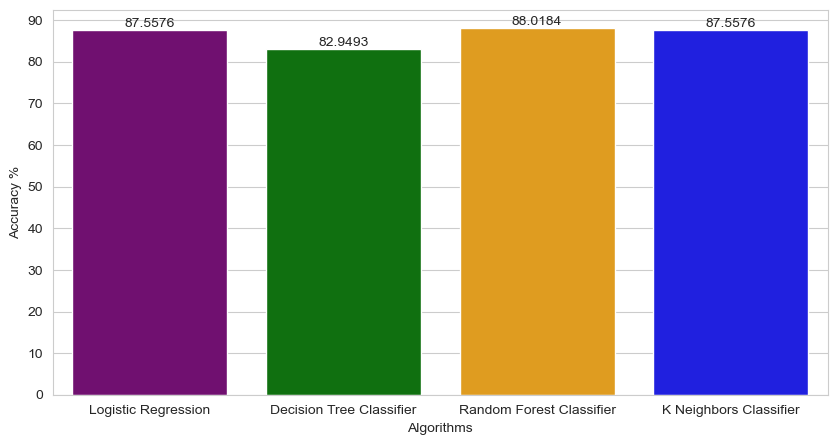

In [13]:
import seaborn as sns
colors = ['purple', 'green', 'orange', 'blue']

sns.set_style ('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel('Accuracy %')
plt.xlabel('Algorithms')

ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()),palette=colors)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

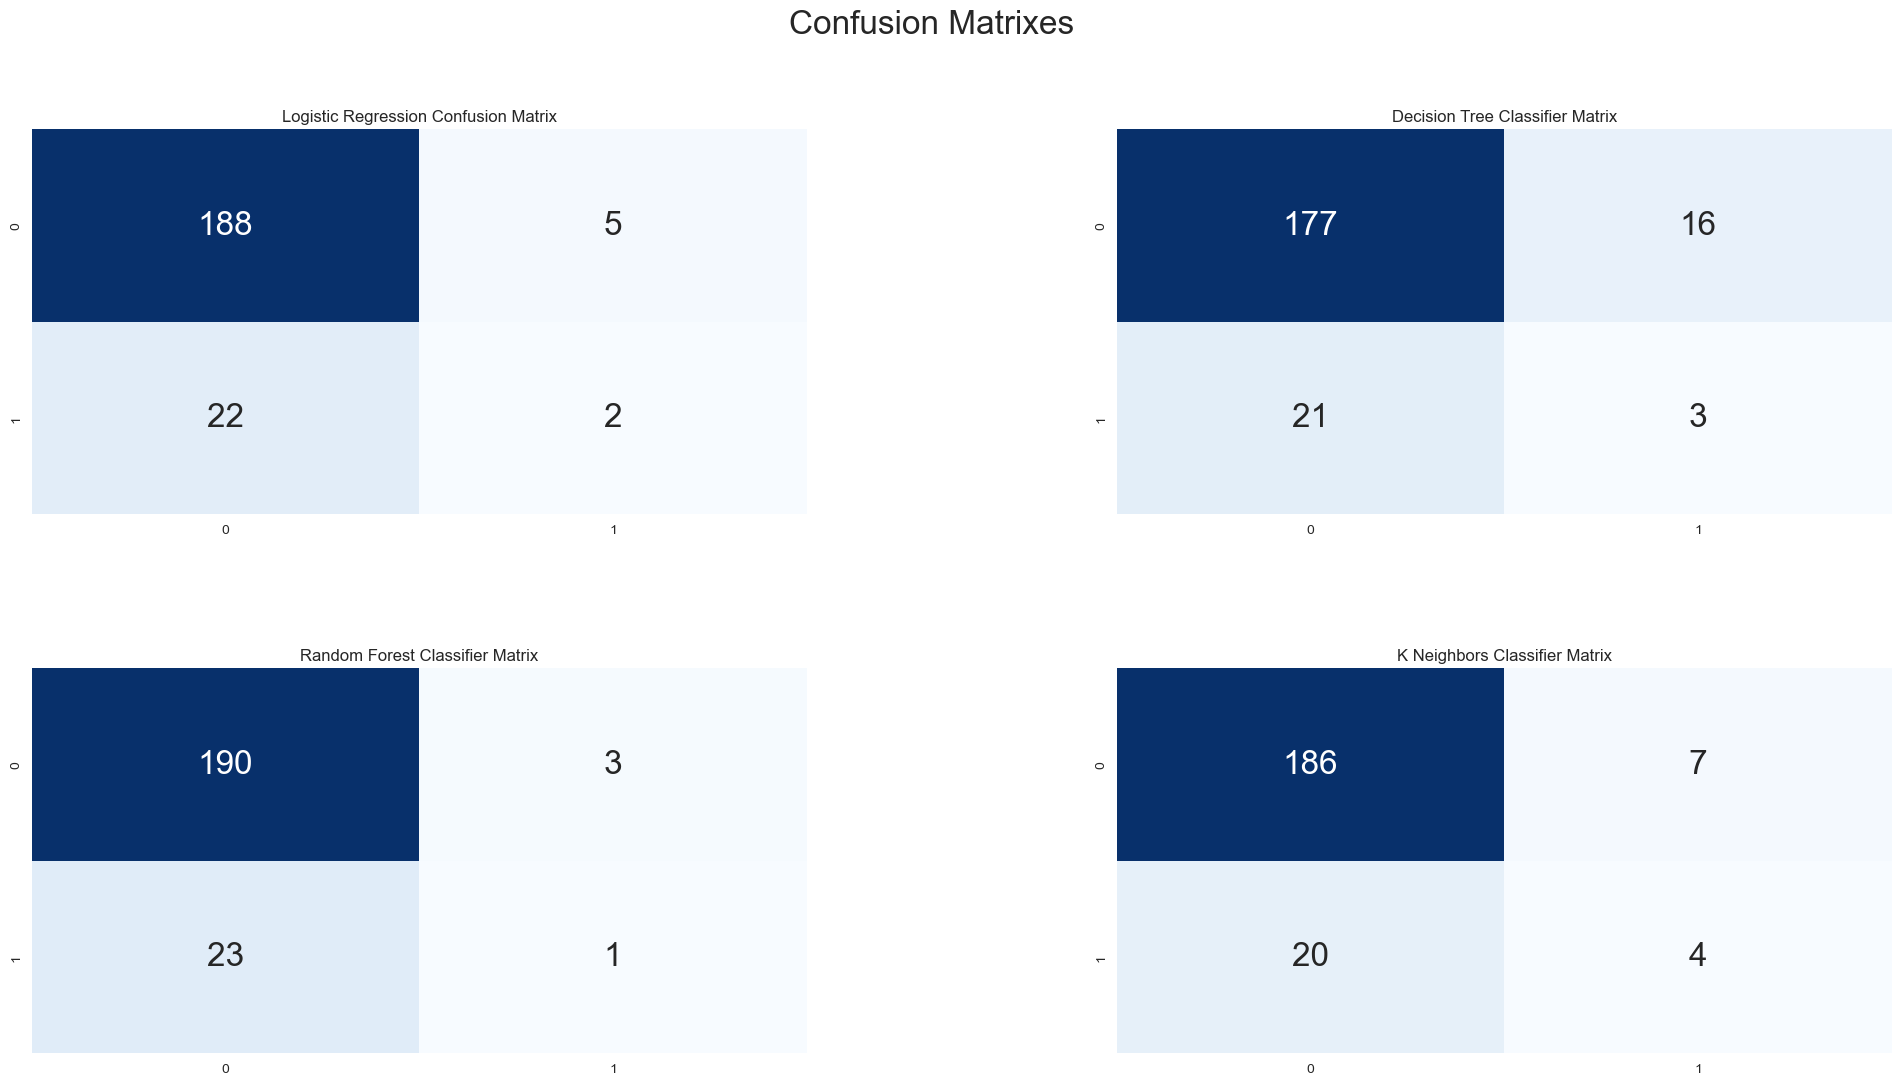

In [14]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, lr.predict(X_test))
cm_dtc = confusion_matrix(y_test, dtc.predict(X_test))
cm_rf = confusion_matrix(y_test, rf.predict(X_test))
cm_knn = confusion_matrix(y_test, knn.predict(X_test))


plt.figure(figsize=(24,12))

plt.suptitle('Confusion Matrixes', fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

plt.subplot(2,2,1)
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

plt.subplot(2,2,2)
plt.title('Decision Tree Classifier Matrix')
sns.heatmap(cm_dtc, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

plt.subplot(2,2,3)
plt.title('Random Forest Classifier Matrix')
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

plt.subplot(2,2,4)
plt.title('K Neighbors Classifier Matrix')
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

plt.show()

### 6. Feature selection

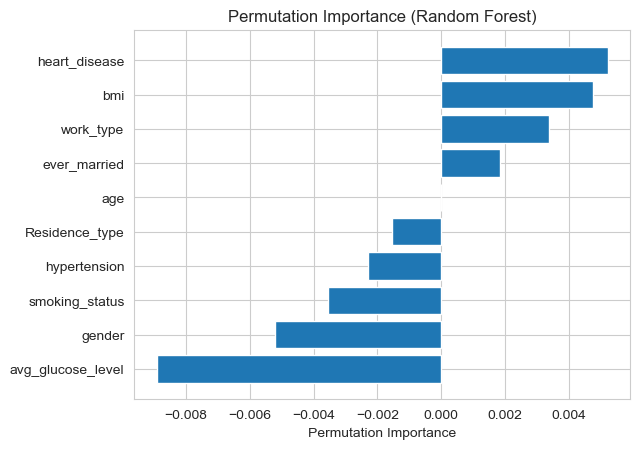

In [15]:
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = stroke.drop(["stroke"], axis=1).columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Random Forest)')
plt.show()


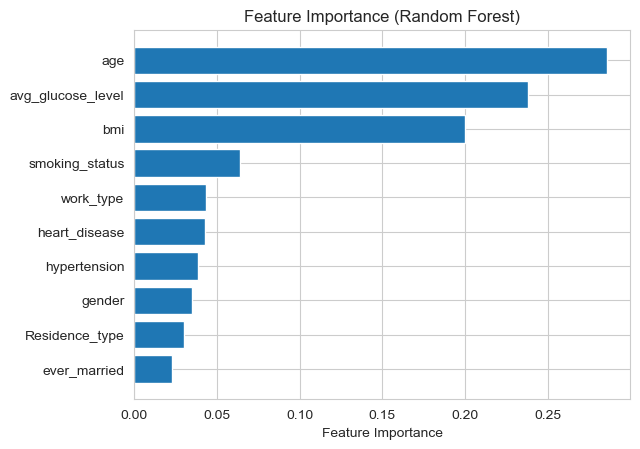

In [16]:
# Get feature importances from RandomForest
rf_feature_importances = rf.feature_importances_

# Sort features by importance
sorted_idx_rf = rf_feature_importances.argsort()

# Plot feature importances from RandomForest
plt.barh(range(len(sorted_idx_rf)), rf_feature_importances[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


In [17]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Decision tree
import matplotlib.pyplot as plt
import pydotplus

In [18]:
important_features = ['age', 'avg_glucose_level', 'bmi', 'work_type']

f = stroke[important_features] #input
t = stroke['stroke'] #target

In [19]:
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_dt.fit(f,t)

dot_data = export_graphviz(clf_dt,
                           feature_names=important_features,
                           out_file=None,
                           filled=True,
                           rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree.png')

True

### 7. Re-target the selection

In [23]:
stroke.loc[:,['age','avg_glucose_level','bmi']].values

array([[ 31.  ,  70.66,  27.2 ],
       [ 13.  ,  85.81,  18.6 ],
       [ 18.  ,  60.56,  33.  ],
       ...,
       [ 81.  , 234.35,  25.3 ],
       [ 81.  ,  80.43,  29.7 ],
       [ 57.  , 108.61,  38.1 ]])

In [24]:
y = stroke['stroke'].values
X = stroke.loc[:,['age','avg_glucose_level','bmi']].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression 

accuracies = {}

lr = LogisticRegression()
lr.fit(X_train, y_train)

# acc = lr.score(X_test, y_test)*100
accuracies['Logistic Regression'] = lr.score(X_test, y_test)*100
# accuracies['Logistic Regression'] = acc

# print("Test Accuracy {:.3f}%".format(acc))
print(f"Test Accuracy {accuracies['Logistic Regression']:.2f}%")

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# acc = lr.score(X_test, y_test)*100
accuracies['Decision Tree Classifier'] = dtc.score(X_test, y_test)*100
# accuracies['Logistic Regression'] = acc

# print("Test Accuracy {:.3f}%".format(acc))
print(f"Test Accuracy {accuracies['Decision Tree Classifier']:.2f}%")

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# acc = lr.score(X_test, y_test)*100
accuracies['Random Forest Classifier'] = rf.score(X_test, y_test)*100
# accuracies['Logistic Regression'] = acc

# print("Test Accuracy {:.3f}%".format(acc))
print(f"Test Accuracy {accuracies['Random Forest Classifier']:.2f}%")

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# acc = lr.score(X_test, y_test)*100
accuracies['K Neighbors Classifier'] = knn.score(X_test, y_test)*100
# accuracies['Logistic Regression'] = acc

# print("Test Accuracy {:.3f}%".format(acc))
print(f"Test Accuracy {accuracies['K Neighbors Classifier']:.2f}%")

Test Accuracy 88.94%
Test Accuracy 81.11%
Test Accuracy 86.64%
Test Accuracy 87.56%


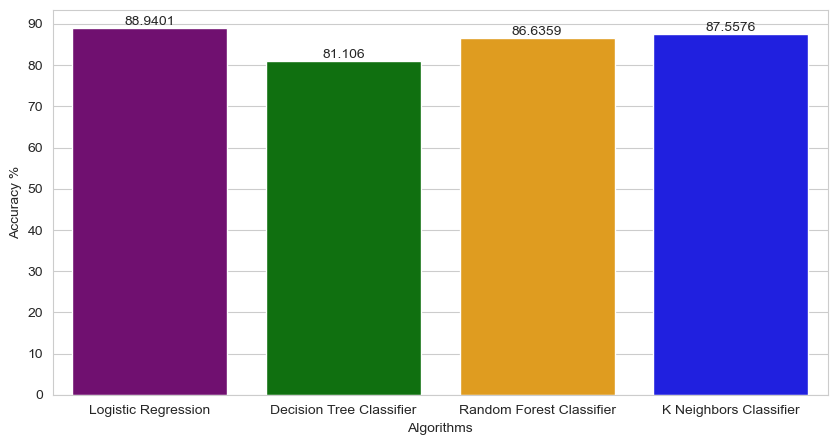

In [27]:
import seaborn as sns
colors = ['purple', 'green', 'orange', 'blue']

sns.set_style ('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel('Accuracy %')
plt.xlabel('Algorithms')

ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()),palette=colors)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

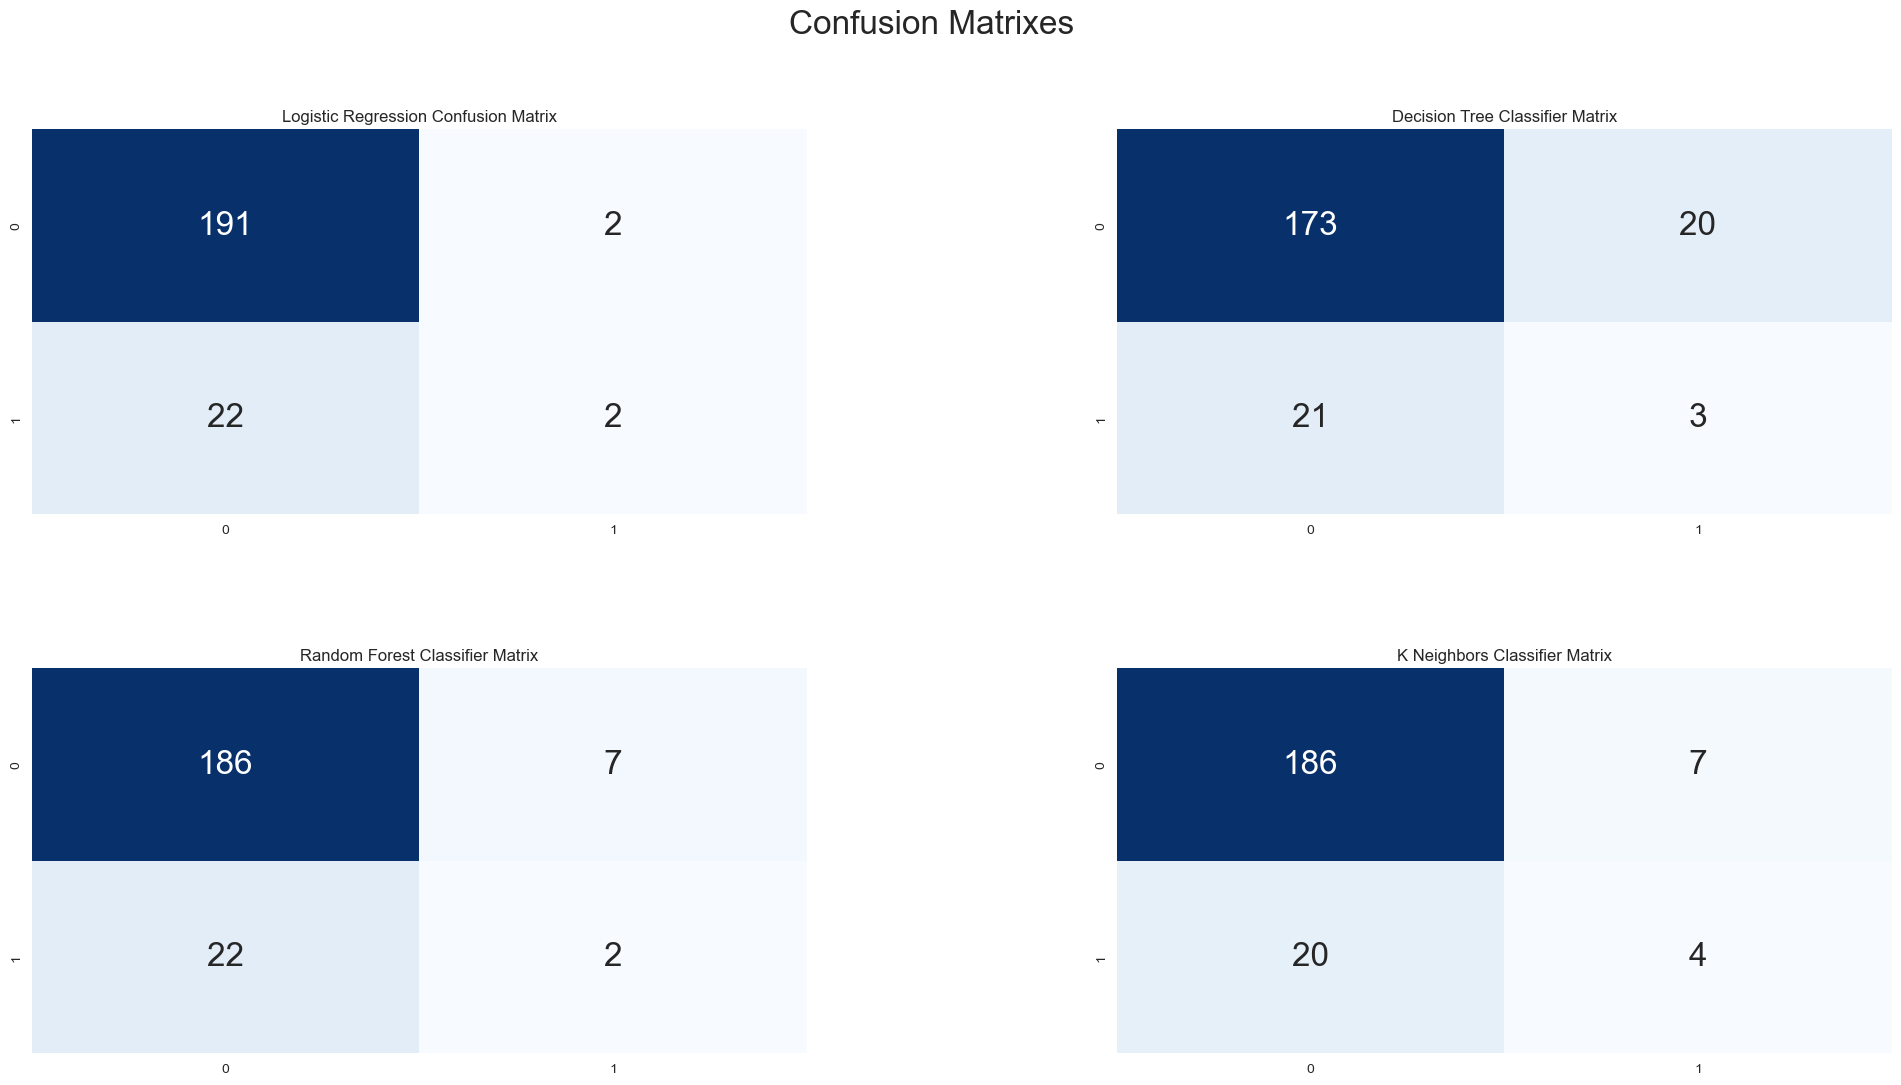

In [28]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, lr.predict(X_test))
cm_dtc = confusion_matrix(y_test, dtc.predict(X_test))
cm_rf = confusion_matrix(y_test, rf.predict(X_test))
cm_knn = confusion_matrix(y_test, knn.predict(X_test))


plt.figure(figsize=(24,12))

plt.suptitle('Confusion Matrixes', fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

plt.subplot(2,2,1)
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

plt.subplot(2,2,2)
plt.title('Decision Tree Classifier Matrix')
sns.heatmap(cm_dtc, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

plt.subplot(2,2,3)
plt.title('Random Forest Classifier Matrix')
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

plt.subplot(2,2,4)
plt.title('K Neighbors Classifier Matrix')
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

plt.show()